# Automobile Loan Default Prediction

#### Data Dictionary
| Variable | Definition |
|----------|------------|
|ID| Client Loan application ID |
|Client_Income| Client Income in dollars |
|Car_Owned| Any Car owned by client before applying for the loan (0 means No and 1 means otherwise) |
|Bike_Owned| Any bike owned by client (0 means No and 1 means otherwise) |
|Active_Loan| Any other active loan at the time of application for the loan (0 means No and 1 means otherwise) |
|House_Own| Any house owned by the client (0 means No and 1 means otherwise) |
|Child_Count| Number of children the client has |
|Credit_Amount| Credit amount of the loan in dollars |
|Loan_Annuity| Loan annuity in dollars |
|Accompany_Client| Who accompanied the client when the client applied for the loan |
|Client_Education| Highest level of education achieved by the client |
|Client_Marital_Status| Marital status of the client (D- Divorced, S- Single, M- Married, W- Widowed) |
|Client_Gender| Gender of the Client |
|Loan_Contract_Type| Loan Type (CL- Cash Loan, RL- Revolving Loan) |
|Client_Housing_Type| Client Housing situation |
|Population_Region_Relative| Relative population of the region where the client is living. A higher value means the client is living in a more populated area|
|Age_Days| Age of the client at the time of application submission |
|Employed_Days| Days before the application when the client started earning |
|Registration_Days| Days before the loan application when the client changed his/her registration |
|ID_Days| Days before the loan application when the client changed his/her identity document with which the loan was applied |
|Own_House_Age| Age of the Client's house in years |
|Mobile_Tag| Mobile Number provided by Client (1 means Yes and 0 means No) |
|Homephone_Tag| Homephone Number provided by Client (1 means Yes and 0 means No) |
|Workphone_Working| Was the workphone number reachable (1 means Yes and 0 means No) |
|Client_Occupation| Client Occupation type |
|Client_Family_Members| Number of family members the client has |
|Client_City_Rating| Client city rating. 3 denotes best, 2 denotes good, and 1 denotes average |
|Application_Process_Day| Day of the week on which the client applied for the loan (0-Sun, 1-Mon, 2-Tues, 3-Wed, 4-Thurs, 5-Fri, 6-Sat) |
|Application_Process_Hour| Hour of the day when the client applied for the loan |
|Client_Permanent_Match_Tag| Indication if the client's contact address does not match the permanent address |
|Client_Contact_Work_Tag| Indication if the client's work address does not match the contact address |
|Type_Organization| Type of organization where the client works |
|Score_Source_1| Score sourced from another source. This is a normalized score |
|Score_Source_2| Score sourced from another source. This is a normalized score |
|Score_Source_3| Score sourced from another source. This is a normalized score |
|Social_Circle_Default| How many friends/family members of the client defaulted on any loan payment in the last 60 days |
|Phone_Change| How many days before the loan application the client changed his/her phone |
|Credit_Bureau| Total number of inquiries in the last year |
|Default| 1 means the client defaulted on loan payments and 0 means otherwise |

In [91]:
# importing libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, jaccard_score, log_loss
from sklearn.metrics import confusion_matrix
from scipy import stats
import warnings

warnings.filterwarnings('ignore')
pd.options.display.float_format = '{:,.2f}'.format
sns.set_theme(color_codes=True)
pd.set_option('display.max_columns', None)

In [2]:
df = pd.read_csv('Train_Dataset.csv')
df.head()

,ID,Client_Income,Car_Owned,Bike_Owned,Active_Loan,House_Own,Child_Count,Credit_Amount,Loan_Annuity,Accompany_Client,...,Client_Permanent_Match_Tag,Client_Contact_Work_Tag,Type_Organization,Score_Source_1,Score_Source_2,Score_Source_3,Social_Circle_Default,Phone_Change,Credit_Bureau,Default
0,12142509,6750,0.00,0.00,1.00,0.00,0.00,61190.55,3416.85,Alone,...,Yes,Yes,Self-employed,0.57,0.48,NaN,0.02,63.00,NaN,0
1,12138936,20250,1.00,0.00,1.00,NaN,0.00,15282,1826.55,Alone,...,Yes,Yes,Government,0.56,0.22,NaN,NaN,NaN,NaN,0
2,12181264,18000,0.00,0.00,1.00,0.00,1.00,59527.35,2788.2,Alone,...,Yes,Yes,Self-employed,NaN,0.55,0.33,0.07,277.00,0.00,0
3,12188929,15750,0.00,0.00,1.00,1.00,0.00,53870.4,2295.45,Alone,...,Yes,Yes,XNA,NaN,0.14,0.63,NaN,"1,700.00",3.00,0
4,12133385,33750,1.00,0.00,1.00,0.00,2.00,133988.4,3547.35,Alone,...,Yes,Yes,Business Entity Type 3,0.51,0.30,0.36,0.20,674.00,1.00,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121856 entries, 0 to 121855
Data columns (total 40 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   ID                          121856 non-null  int64  
 1   Client_Income               118249 non-null  object 
 2   Car_Owned                   118275 non-null  float64
 3   Bike_Owned                  118232 non-null  float64
 4   Active_Loan                 118221 non-null  float64
 5   House_Own                   118195 non-null  float64
 6   Child_Count                 118218 non-null  float64
 7   Credit_Amount               118224 non-null  object 
 8   Loan_Annuity                117044 non-null  object 
 9   Accompany_Client            120110 non-null  object 
 10  Client_Income_Type          118155 non-null  object 
 11  Client_Education            118211 non-null  object 
 12  Client_Marital_Status       118383 non-null  object 
 13  Client_Gender 

In [4]:
# checking null values
df.isnull().sum()

ID                                0
Client_Income                  3607
Car_Owned                      3581
Bike_Owned                     3624
Active_Loan                    3635
House_Own                      3661
Child_Count                    3638
Credit_Amount                  3632
Loan_Annuity                   4812
Accompany_Client               1746
Client_Income_Type             3701
Client_Education               3645
Client_Marital_Status          3473
Client_Gender                  2413
Loan_Contract_Type             3651
Client_Housing_Type            3687
Population_Region_Relative     4857
Age_Days                       3600
Employed_Days                  3649
Registration_Days              3614
ID_Days                        5968
Own_House_Age                 80095
Mobile_Tag                        0
Homephone_Tag                     0
Workphone_Working                 0
Client_Occupation             41435
Client_Family_Members          2410
Cleint_City_Rating          

## Data Preprocessing 1

In [5]:
# Drop identifier column
df.drop(columns = ['ID', 'ID_Days'], inplace=True)
df.head()

,Client_Income,Car_Owned,Bike_Owned,Active_Loan,House_Own,Child_Count,Credit_Amount,Loan_Annuity,Accompany_Client,Client_Income_Type,...,Client_Permanent_Match_Tag,Client_Contact_Work_Tag,Type_Organization,Score_Source_1,Score_Source_2,Score_Source_3,Social_Circle_Default,Phone_Change,Credit_Bureau,Default
0,6750,0.00,0.00,1.00,0.00,0.00,61190.55,3416.85,Alone,Commercial,...,Yes,Yes,Self-employed,0.57,0.48,NaN,0.02,63.00,NaN,0
1,20250,1.00,0.00,1.00,NaN,0.00,15282,1826.55,Alone,Service,...,Yes,Yes,Government,0.56,0.22,NaN,NaN,NaN,NaN,0
2,18000,0.00,0.00,1.00,0.00,1.00,59527.35,2788.2,Alone,Service,...,Yes,Yes,Self-employed,NaN,0.55,0.33,0.07,277.00,0.00,0
3,15750,0.00,0.00,1.00,1.00,0.00,53870.4,2295.45,Alone,Retired,...,Yes,Yes,XNA,NaN,0.14,0.63,NaN,"1,700.00",3.00,0
4,33750,1.00,0.00,1.00,0.00,2.00,133988.4,3547.35,Alone,Commercial,...,Yes,Yes,Business Entity Type 3,0.51,0.30,0.36,0.20,674.00,1.00,0


In [6]:
# remove all characters that are not numbers or dots from the 'Client_Income' column
df['Client_Income'] = df['Client_Income'].str.replace('[^0-9.]', '', regex=True)
# convert the values into numbers, and any value that cannot be converted is replaced with NaN
df['Client_Income'] = pd.to_numeric(df['Client_Income'], errors='coerce')

df['Credit_Amount'] = df['Credit_Amount'].str.replace('[^0-9.]', '', regex=True)
df['Credit_Amount'] = pd.to_numeric(df['Credit_Amount'], errors='coerce')

df['Loan_Annuity'] = df['Loan_Annuity'].str.replace('[^0-9.]', '', regex=True)
df['Loan_Annuity'] = pd.to_numeric(df['Loan_Annuity'], errors='coerce')

df['Population_Region_Relative'] = df['Population_Region_Relative'].str.replace('[^0-9.]', '', regex=True)
df['Population_Region_Relative'] = pd.to_numeric(df['Population_Region_Relative'], errors='coerce')

df['Age_Days'] = df['Age_Days'].str.replace('[^0-9.]', '', regex=True)
df['Age_Days'] = pd.to_numeric(df['Age_Days'], errors='coerce')

df['Employed_Days'] = df['Employed_Days'].str.replace('[^0-9.]', '', regex=True)
df['Employed_Days'] = pd.to_numeric(df['Employed_Days'], errors='coerce')

df['Registration_Days'] = df['Registration_Days'].str.replace('[^0-9.]', '', regex=True)
df['Registration_Days'] = pd.to_numeric(df['Registration_Days'], errors='coerce')

df['Score_Source_3'] = df['Score_Source_3'].str.replace('[^0-9.]', '', regex=True)
df['Score_Source_3'] = pd.to_numeric(df['Score_Source_3'], errors='coerce')

df.head()

,Client_Income,Car_Owned,Bike_Owned,Active_Loan,House_Own,Child_Count,Credit_Amount,Loan_Annuity,Accompany_Client,Client_Income_Type,...,Client_Permanent_Match_Tag,Client_Contact_Work_Tag,Type_Organization,Score_Source_1,Score_Source_2,Score_Source_3,Social_Circle_Default,Phone_Change,Credit_Bureau,Default
0,"6,750.00",0.00,0.00,1.00,0.00,0.00,"61,190.55","3,416.85",Alone,Commercial,...,Yes,Yes,Self-employed,0.57,0.48,NaN,0.02,63.00,NaN,0
1,"20,250.00",1.00,0.00,1.00,NaN,0.00,"15,282.00","1,826.55",Alone,Service,...,Yes,Yes,Government,0.56,0.22,NaN,NaN,NaN,NaN,0
2,"18,000.00",0.00,0.00,1.00,0.00,1.00,"59,527.35","2,788.20",Alone,Service,...,Yes,Yes,Self-employed,NaN,0.55,NaN,0.07,277.00,0.00,0
3,"15,750.00",0.00,0.00,1.00,1.00,0.00,"53,870.40","2,295.45",Alone,Retired,...,Yes,Yes,XNA,NaN,0.14,NaN,NaN,"1,700.00",3.00,0
4,"33,750.00",1.00,0.00,1.00,0.00,2.00,"133,988.40","3,547.35",Alone,Commercial,...,Yes,Yes,Business Entity Type 3,0.51,0.30,NaN,0.20,674.00,1.00,0


In [7]:
df['Client_Occupation'].value_counts()

Laborers              21024
Sales                 12136
Core                  10611
Managers               8099
Drivers                7150
High skill tech        4317
Accountants            3766
Medicine               3172
Security               2683
Cooking                2224
Cleaning               1722
Private service        1006
Low-skill Laborers      787
Secretaries             531
Waiters/barmen          511
Realty agents           280
HR                      206
IT                      196
Name: Client_Occupation, dtype: int64

# Segment Client Occupation into smaller Unique Value

In [8]:
category_mapping = {
    'Sales': 'White Collar',
    'Realty agents': 'White Collar',
    'Managers': 'White Collar',
    'Accountants': 'White Collar',
    'High skill tech': 'White Collar',
    'IT': 'White Collar',
    'Laborers': 'Blue Collar',
    'Core': 'Blue Collar',
    'Drivers': 'Blue Collar',
    'Cleaning': 'Blue Collar',
    'Low-skill Laborers': 'Blue Collar',
    'HR': 'Service',
    'Waiters/barmen': 'Service',
    'Cooking': 'Service',
    'Private service': 'Service',
    'Security': 'Service',
    'Secretaries': 'Service',
    'Medicine': 'Medical'
}
# replace with the values from the dictionary, and those that don't match are replaced with unknown
df['Client_Occupation'] = df['Client_Occupation'].apply(lambda x: category_mapping.get(x, 'Unknown'))

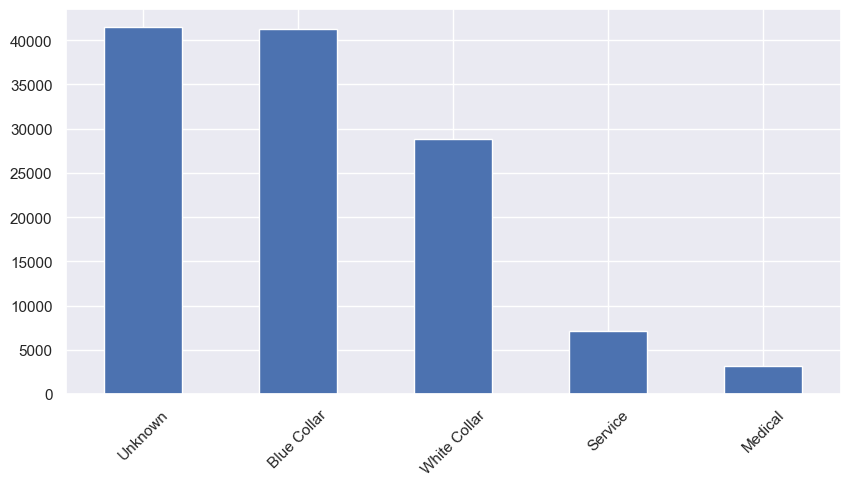

In [9]:
plt.figure(figsize=(10,5))
df['Client_Occupation'].value_counts().plot(kind='bar')
plt.xticks(rotation=45)
plt.show()

In [10]:
df['Type_Organization'].value_counts()

Business Entity Type 3    26279
XNA                       21085
Self-employed             14725
Other                      6290
Medicine                   4320
Business Entity Type 2     4126
Government                 3971
School                     3371
Trade: type 7              2979
Kindergarten               2686
Construction               2623
Business Entity Type 1     2313
Transport: type 4          2076
Trade: type 3              1338
Security                   1284
Industry: type 9           1280
Industry: type 3           1235
Housing                    1162
Military                   1031
Bank                       1012
Agriculture                1011
Industry: type 11           999
Police                      934
Postal                      834
Transport: type 2           811
Security Ministries         756
Trade: type 2               717
Restaurant                  710
Services                    570
University                  559
Transport: type 3           501
Industry

In [11]:
# Define a function to map original values to new categories
def map_organization(category):
    if pd.isna(category) or category == 'XNA':
        return 'Unknown'
    elif 'Business Entity Type' in category:
        return 'Business Entity'  # Group all 'Business Entity Type' together
    elif 'Industry: type' in category:
        return 'Industry'  # Group all 'Industry: type' together
    elif 'Trade: type' in category:
        return 'Trade'  # Group all 'Trade: type' together
    elif 'Transport: type' in category:
        return 'Transport'  # Group all 'Transport: type' together
    else:
        return 'Other'

# Apply the function to the 'Type_Organization' column
df['Type_Organization'] = df['Type_Organization'].apply(map_organization)

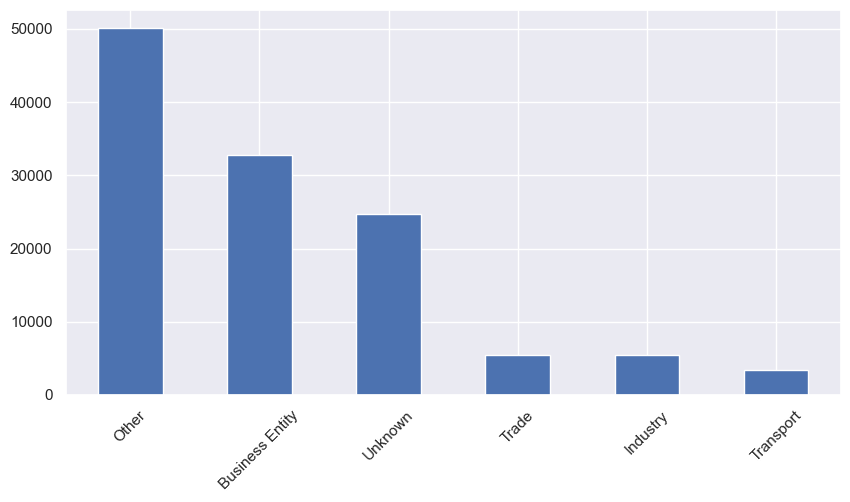

In [12]:
plt.figure(figsize=(10,5))
df['Type_Organization'].value_counts().plot(kind='bar')
plt.xticks(rotation=45)
plt.show()

In [13]:
# Replace 1 with 'yes' and 0 with 'no' in the categorical column
df['Car_Owned'] = df['Car_Owned'].replace({0: 'no', 1: 'yes'})
df['Bike_Owned'] = df['Bike_Owned'].replace({0: 'no', 1: 'yes'})
df['Active_Loan'] = df['Active_Loan'].replace({0: 'no', 1: 'yes'})
df['House_Own'] = df['House_Own'].replace({0: 'no', 1: 'yes'})
df['Mobile_Tag'] = df['Mobile_Tag'].replace({0: 'no', 1: 'yes'})
df['Homephone_Tag'] = df['Homephone_Tag'].replace({0: 'no', 1: 'yes'})
df['Workphone_Working'] = df['Workphone_Working'].replace({0: 'no', 1: 'yes'})
df['Default'] = df['Default'].replace({0: 'no', 1: 'yes'})

In [14]:
df.head()

,Client_Income,Car_Owned,Bike_Owned,Active_Loan,House_Own,Child_Count,Credit_Amount,Loan_Annuity,Accompany_Client,Client_Income_Type,...,Client_Permanent_Match_Tag,Client_Contact_Work_Tag,Type_Organization,Score_Source_1,Score_Source_2,Score_Source_3,Social_Circle_Default,Phone_Change,Credit_Bureau,Default
0,"6,750.00",no,no,yes,no,0.00,"61,190.55","3,416.85",Alone,Commercial,...,Yes,Yes,Other,0.57,0.48,NaN,0.02,63.00,NaN,no
1,"20,250.00",yes,no,yes,NaN,0.00,"15,282.00","1,826.55",Alone,Service,...,Yes,Yes,Other,0.56,0.22,NaN,NaN,NaN,NaN,no
2,"18,000.00",no,no,yes,no,1.00,"59,527.35","2,788.20",Alone,Service,...,Yes,Yes,Other,NaN,0.55,NaN,0.07,277.00,0.00,no
3,"15,750.00",no,no,yes,yes,0.00,"53,870.40","2,295.45",Alone,Retired,...,Yes,Yes,Unknown,NaN,0.14,NaN,NaN,"1,700.00",3.00,no
4,"33,750.00",yes,no,yes,no,2.00,"133,988.40","3,547.35",Alone,Commercial,...,Yes,Yes,Business Entity,0.51,0.30,NaN,0.20,674.00,1.00,no


## Exploratory Data Analysis

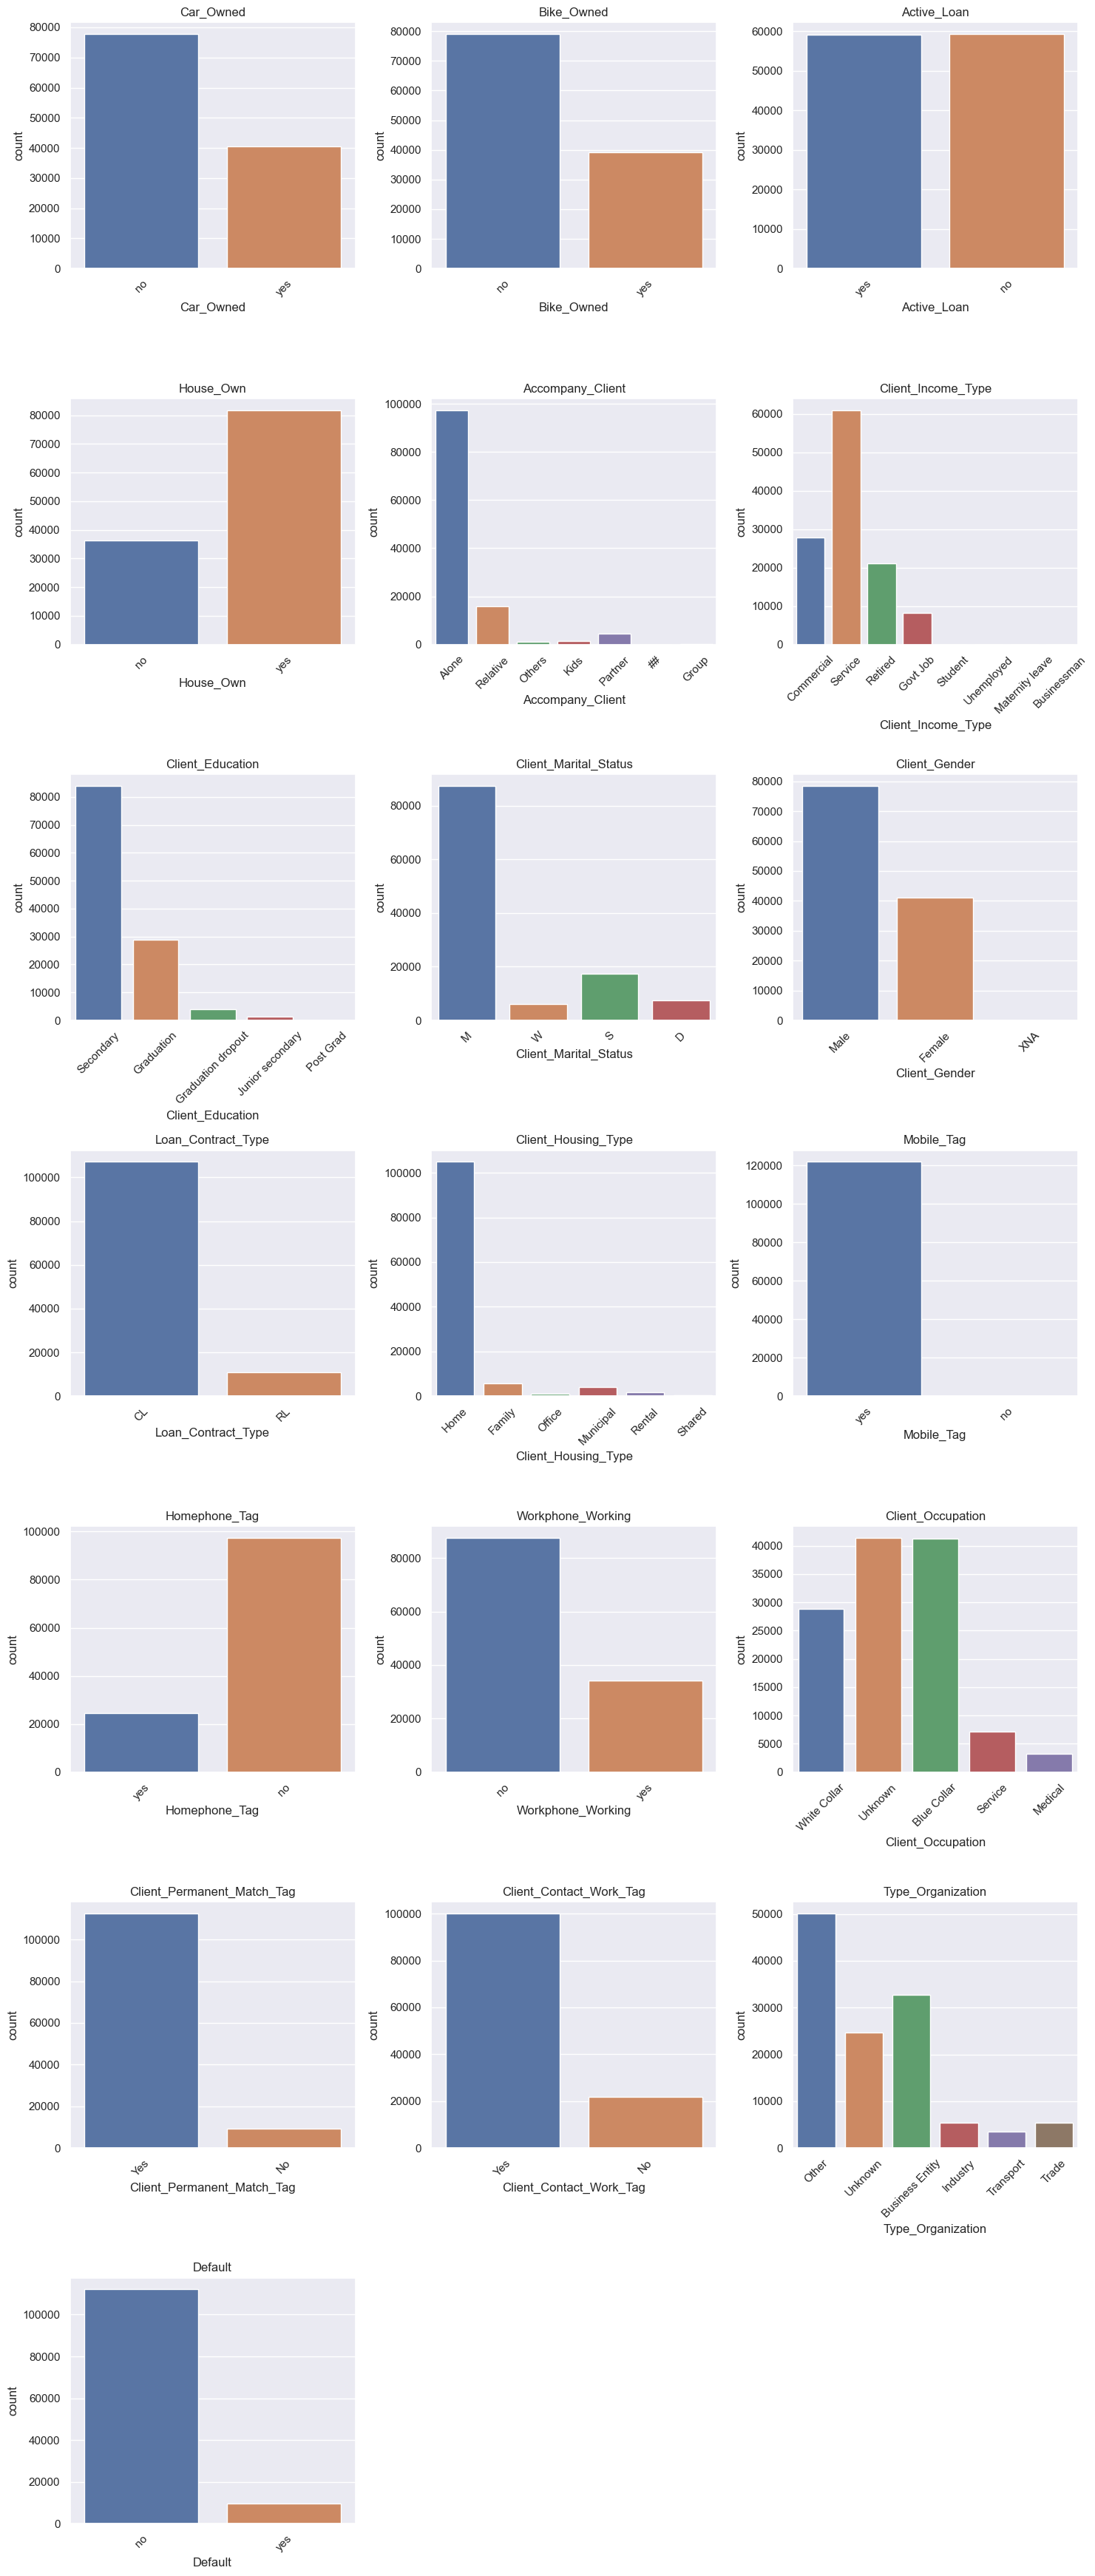

In [15]:
# Get the names of all columns with data type 'object' (categorical columns) and convert into a list
cat_vars = df.select_dtypes(include='object').columns.tolist()

# Create a figure with subplots
num_cols = len(cat_vars)
num_rows = (num_cols + 2) // 3
fig, axs = plt.subplots(nrows=num_rows, ncols=3, figsize=(15, 5*num_rows))
axs = axs.flatten()

# Create a countplot for the top 6 values of each categorical variable using Seaborn
for i, var in enumerate(cat_vars):
    top_values = df[var].value_counts().index
    filtered_df = df[df[var].isin(top_values)]
    sns.countplot(x=var, data=filtered_df, ax=axs[i])
    axs[i].set_title(var)
    axs[i].tick_params(axis='x', rotation=45)

# Remove any extra empty subplots if needed
if num_cols < len(axs):
    for i in range(num_cols, len(axs)):
        fig.delaxes(axs[i])

# Adjust spacing between subplots
fig.tight_layout()

# Show plot
plt.show()

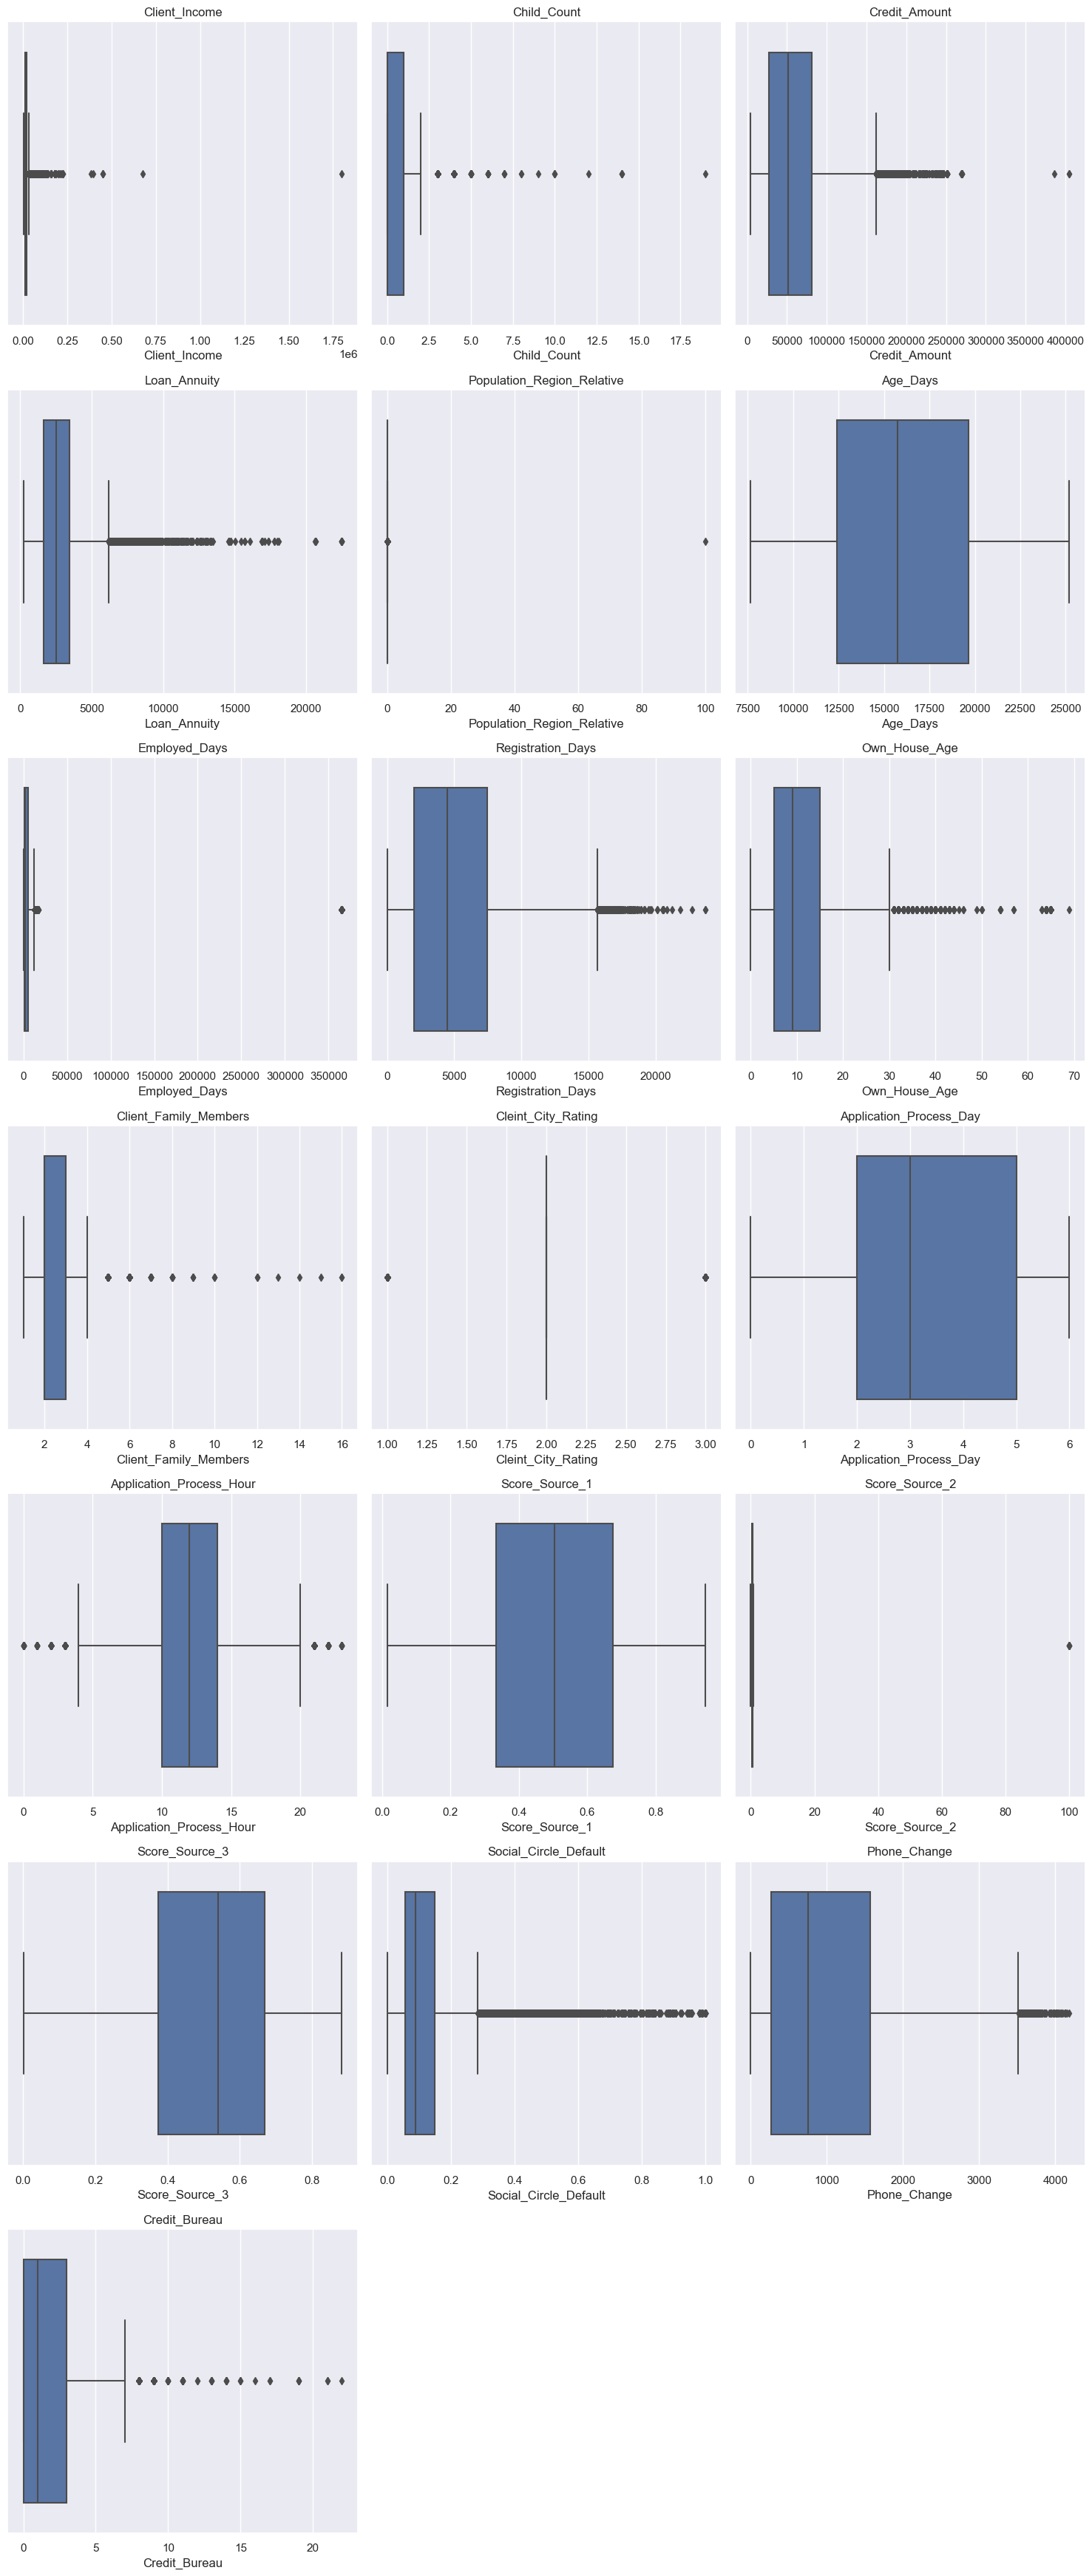

In [16]:
# Get the names of all columns with data type 'int' or 'float', excluding the specified columns
num_vars = df.select_dtypes(include=['int', 'float']).columns.tolist()

# Create a figure with subplots
num_cols = len(num_vars)
num_rows = (num_cols + 2) // 3
fig, axs = plt.subplots(nrows=num_rows, ncols=3, figsize=(15, 5*num_rows))
axs = axs.flatten()

# Create a box plot for each numerical variable using Seaborn
for i, var in enumerate(num_vars):
    sns.boxplot(x=df[var], ax=axs[i])
    axs[i].set_title(var)

# Remove any extra empty subplots if needed
if num_cols < len(axs):
    for i in range(num_cols, len(axs)):
        fig.delaxes(axs[i])

# Adjust spacing between subplots
fig.tight_layout()

# Show plot
plt.show()

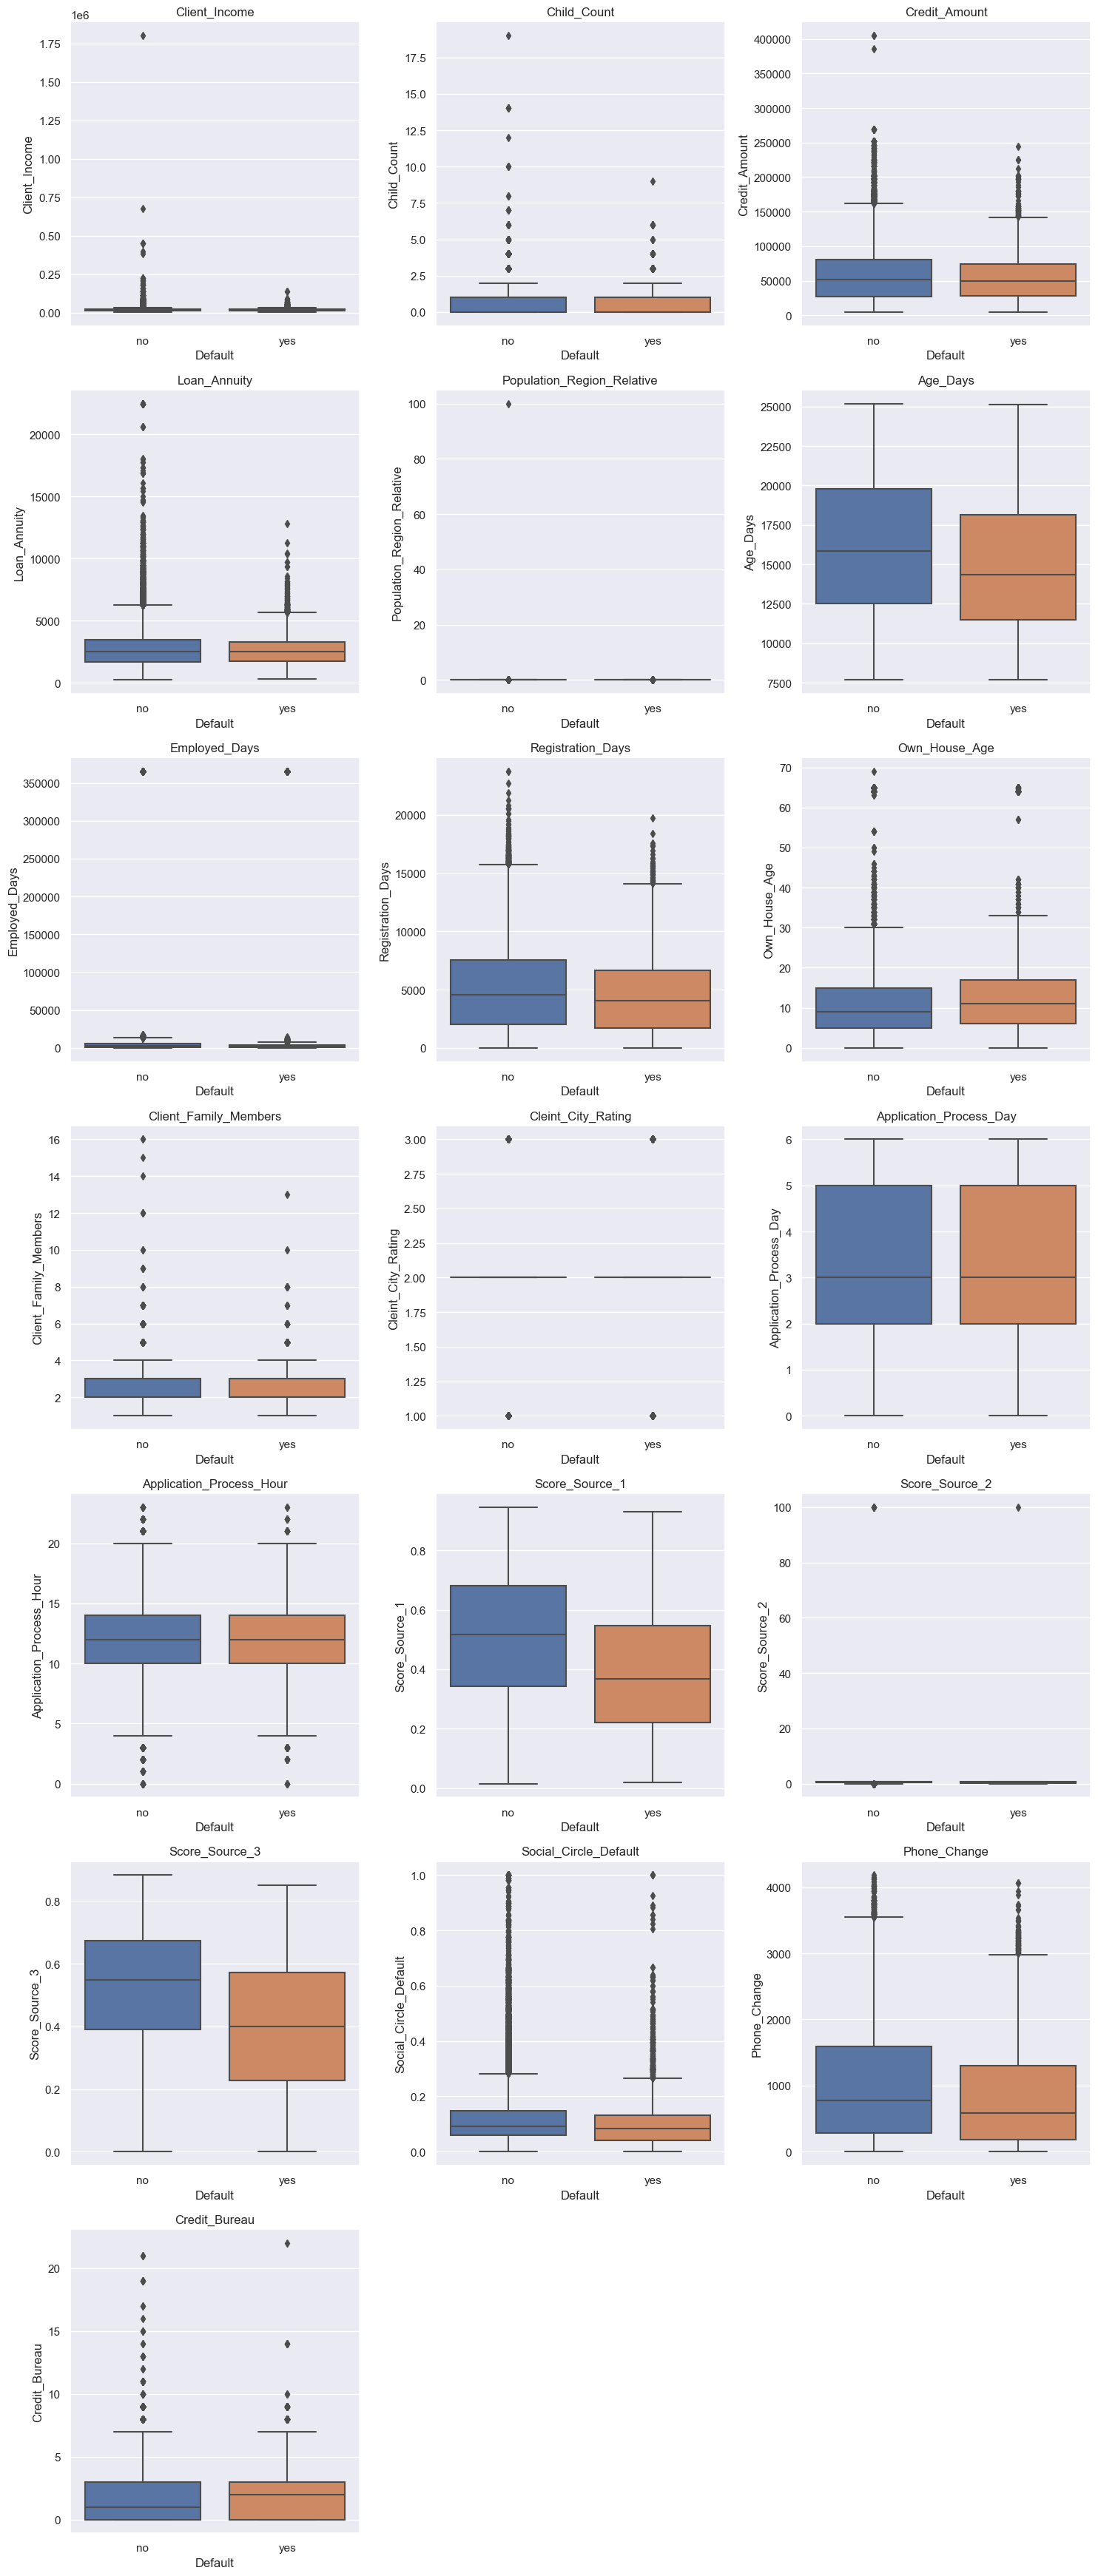

In [17]:
# Get the names of all columns with data type 'int'
int_vars = df.select_dtypes(include=['int', 'float']).columns.tolist()

# Create a figure with subplots
num_cols = len(int_vars)
num_rows = (num_cols + 2) // 3  # To make sure there are enough rows for the subplots
fig, axs = plt.subplots(nrows=num_rows, ncols=3, figsize=(15, 5*num_rows))
axs = axs.flatten()

# Create a box plot for each integer variable using Seaborn with hue='attrition'
for i, var in enumerate(int_vars):
    sns.boxplot(y=var, x='Default', data=df, ax=axs[i])
    axs[i].set_title(var)

# Remove any extra empty subplots if needed
if num_cols < len(axs):
    for i in range(num_cols, len(axs)):
        fig.delaxes(axs[i])

# Adjust spacing between subplots
fig.tight_layout()

# Show plot
plt.show()

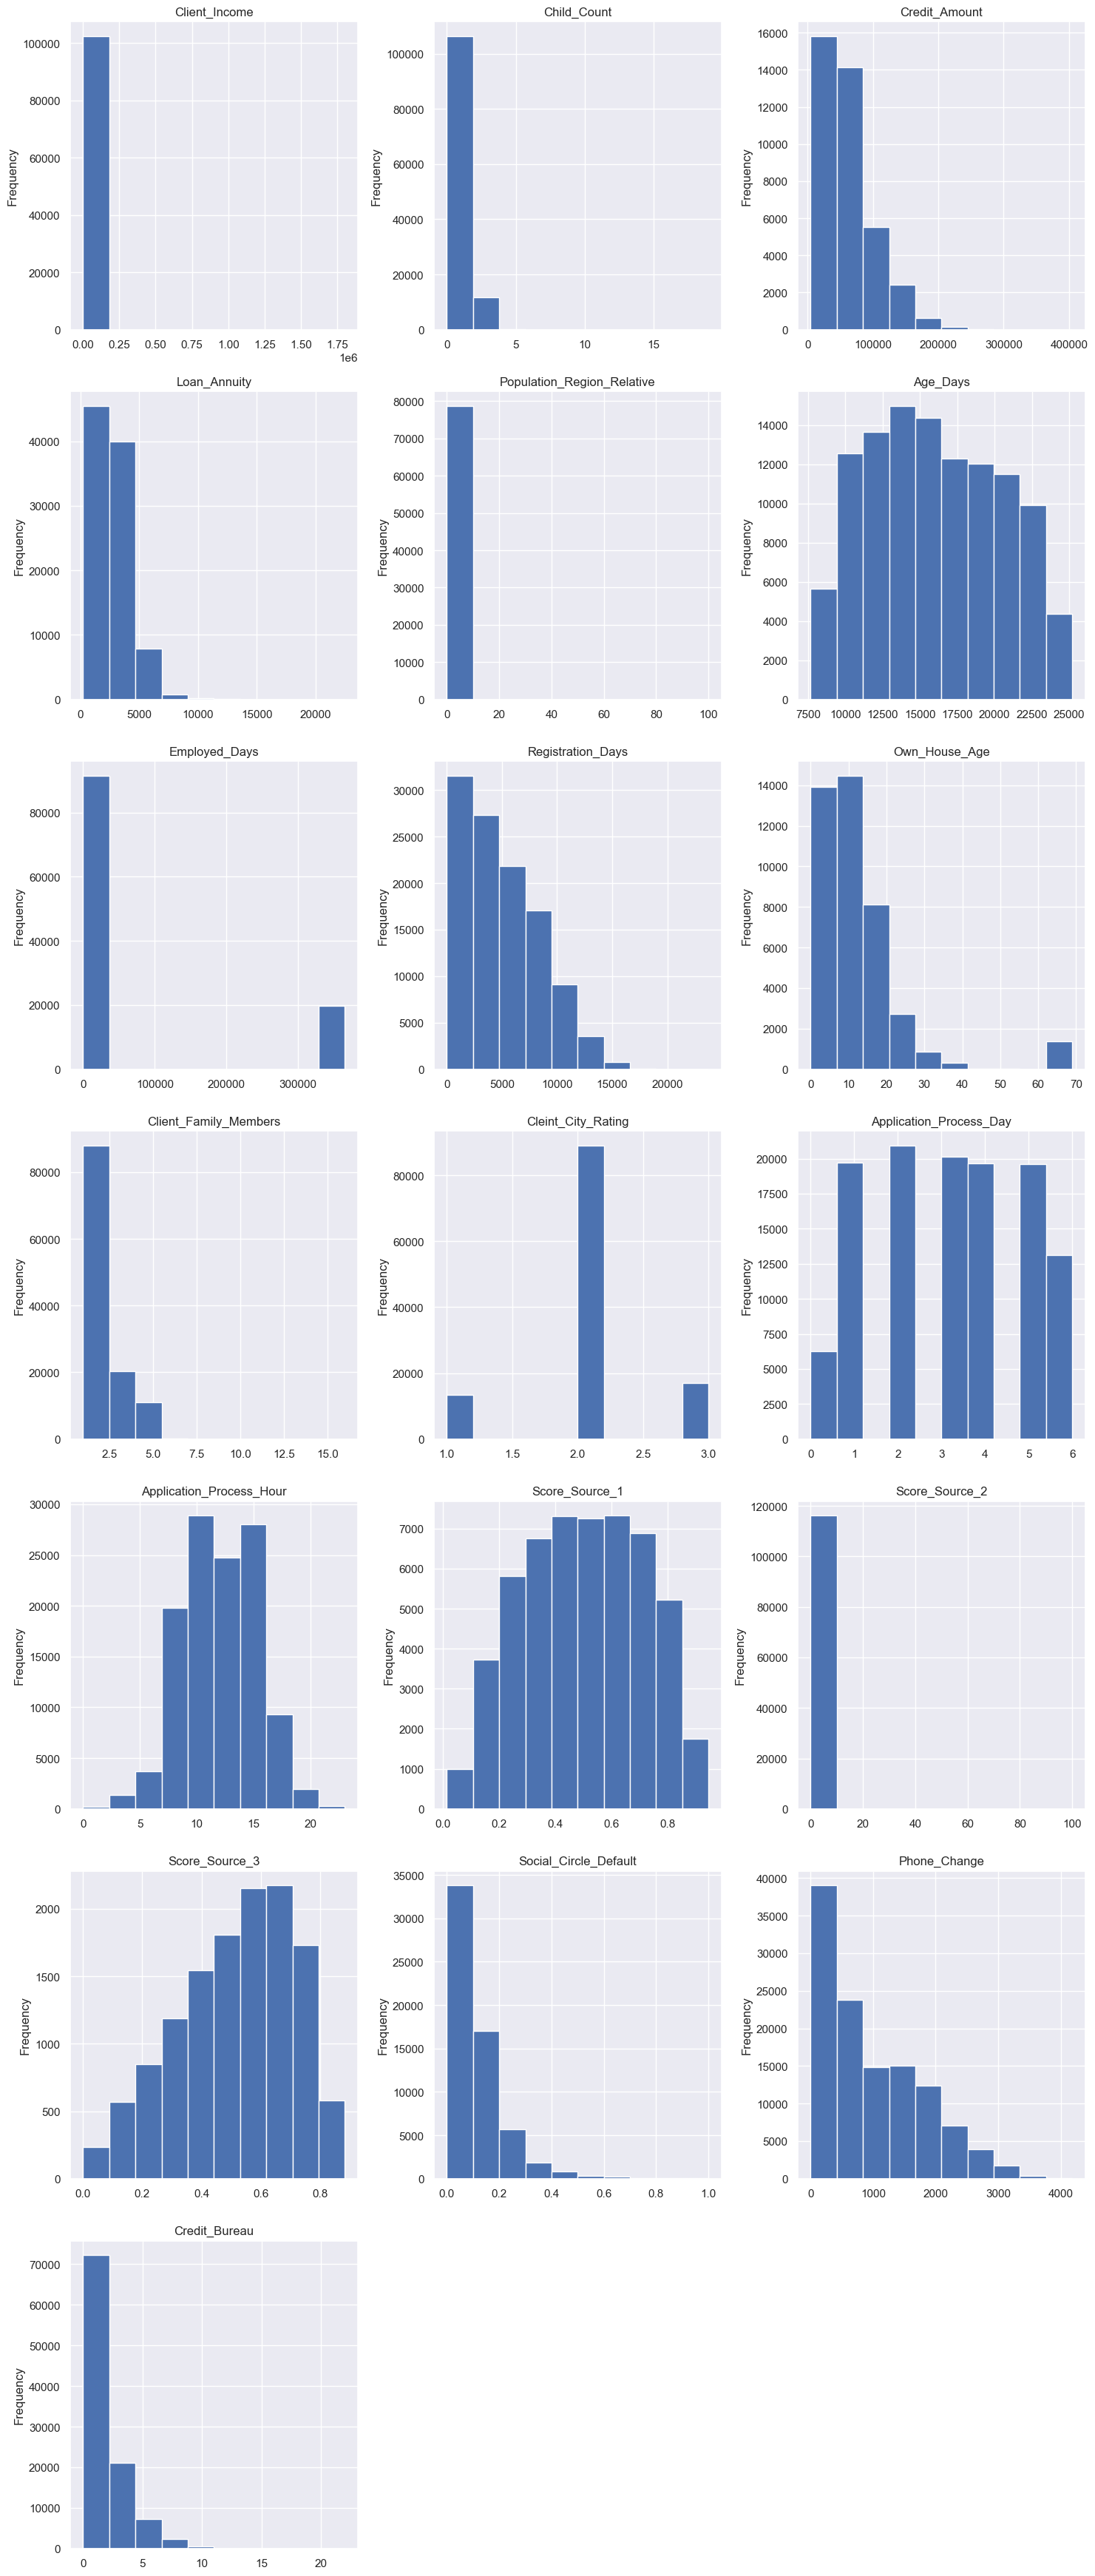

In [18]:
# Get the names of all columns with data type 'int'
int_vars = df.select_dtypes(include=['int', 'float']).columns.tolist()

# Create a figure with subplots
num_cols = len(int_vars)
num_rows = (num_cols + 2) // 3  # To make sure there are enough rows for the subplots
fig, axs = plt.subplots(nrows=num_rows, ncols=3, figsize=(15, 5*num_rows))
axs = axs.flatten()

# Create a histogram for each integer variable
for i, var in enumerate(int_vars):
    df[var].plot.hist(ax=axs[i])
    axs[i].set_title(var)

# Remove any extra empty subplots if needed
if num_cols < len(axs):
    for i in range(num_cols, len(axs)):
        fig.delaxes(axs[i])

# Adjust spacing between subplots
fig.tight_layout()

# Show plot
plt.show()

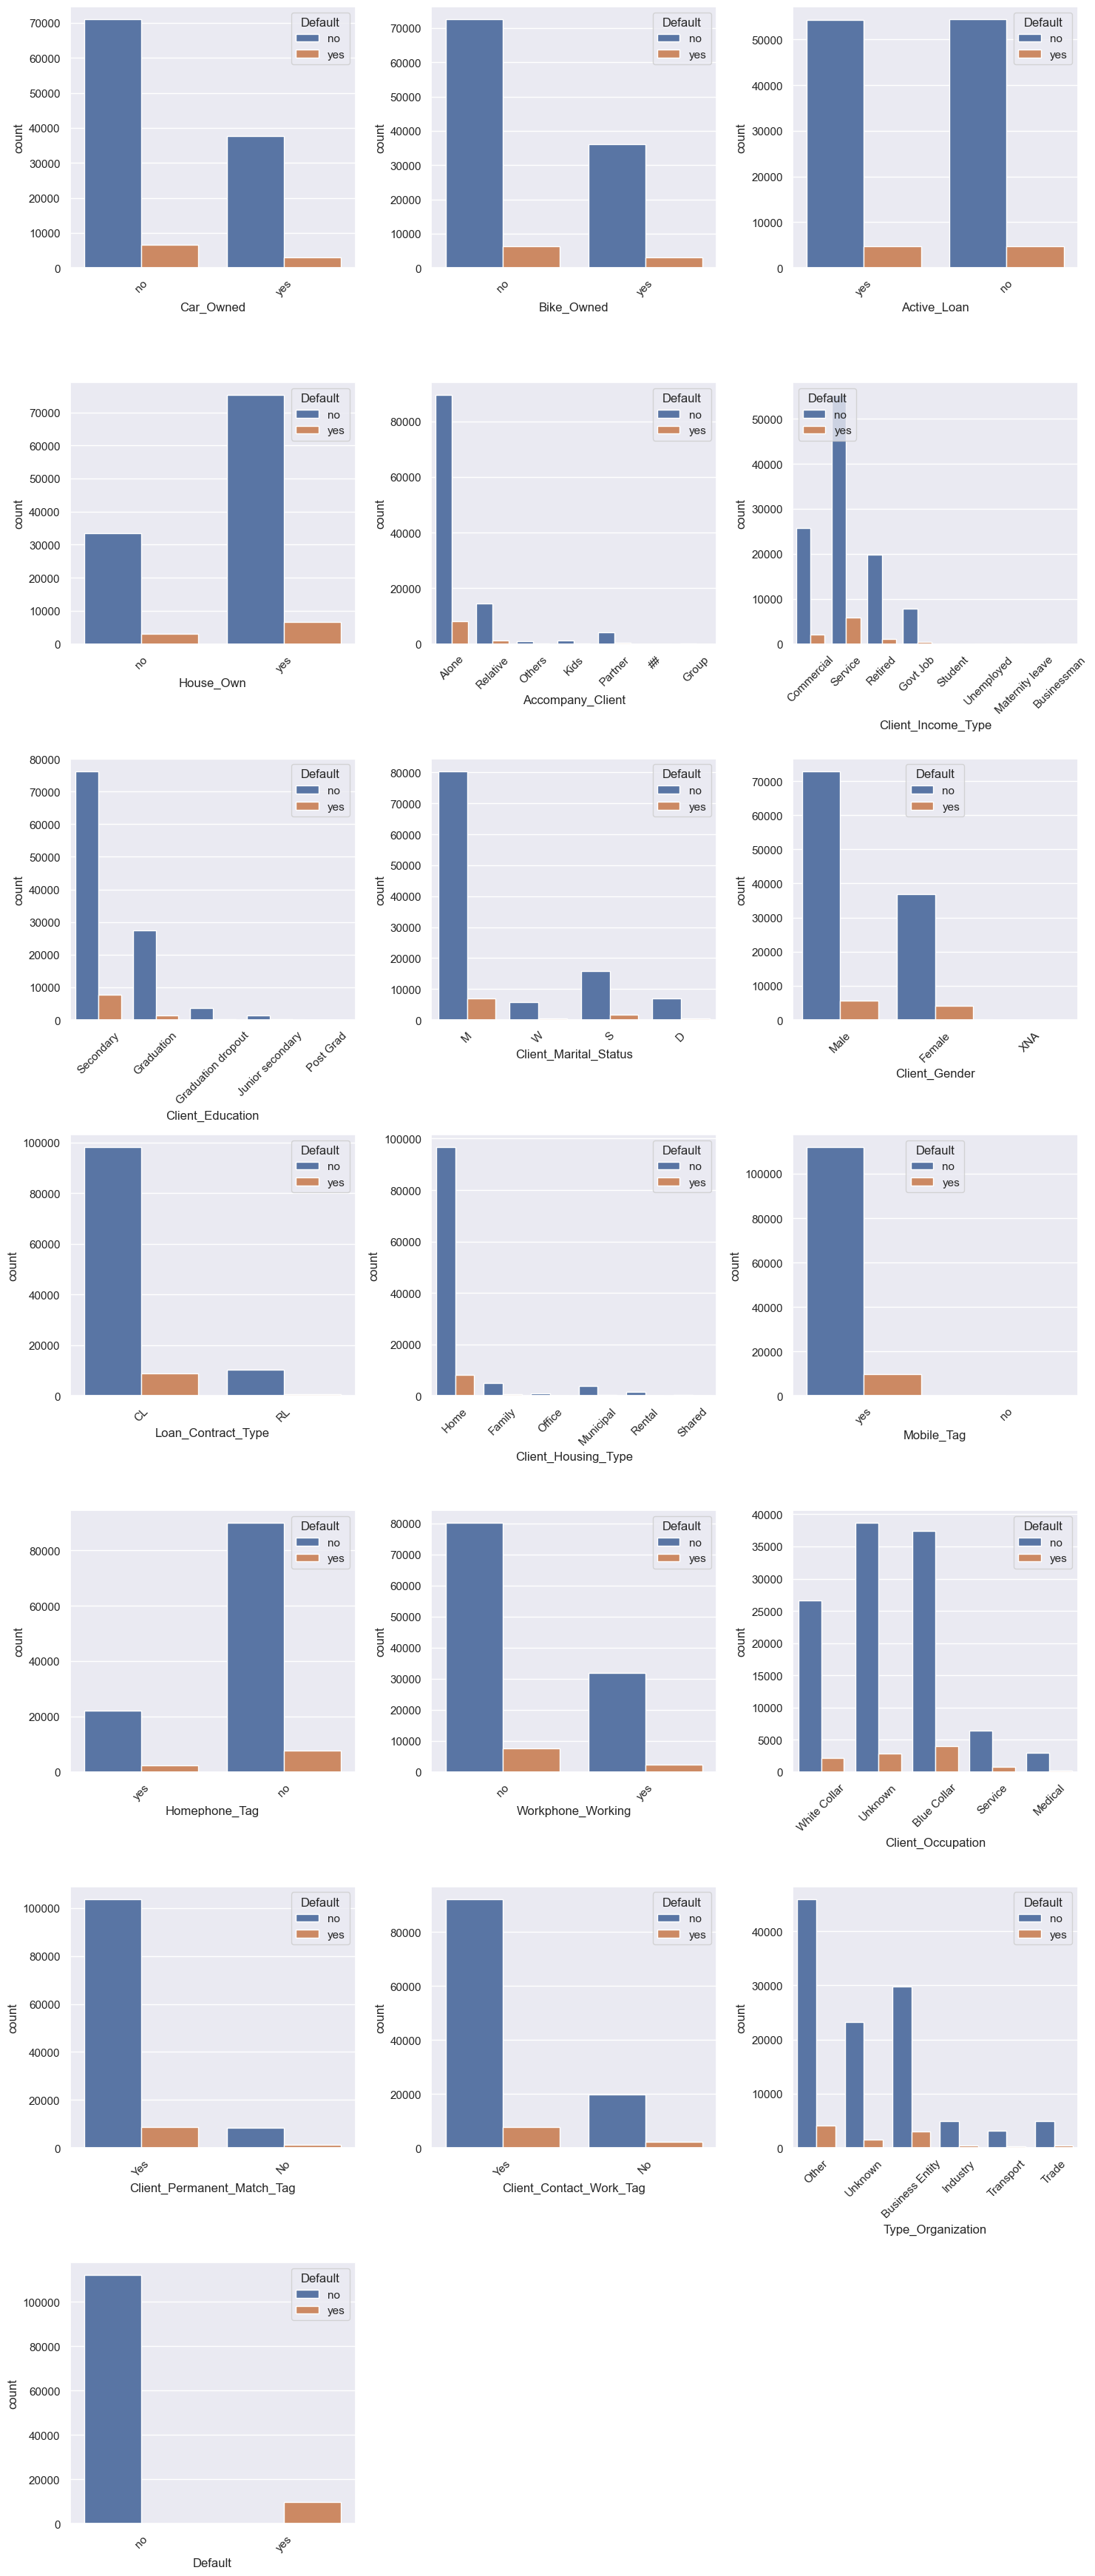

In [19]:
# Create a figure with subplots, but only include the required number of subplots
num_cols = len(cat_vars)
num_rows = (num_cols + 2) // 3  # To make sure there are enough rows for the subplots
fig, axs = plt.subplots(nrows=num_rows, ncols=3, figsize=(15, 5*num_rows))
axs = axs.flatten()

# Create a count plot for each categorical variable
for i, var in enumerate(cat_vars):
    filtered_df = df[df[var].notnull()]  # Exclude rows with NaN values in the variable
    sns.countplot(x=var, hue='Default', data=filtered_df, ax=axs[i])
    axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation=45)

# Remove any remaining blank subplots
for i in range(num_cols, len(axs)):
    fig.delaxes(axs[i])

# Adjust spacing between subplots
fig.tight_layout()

# Show the plot
plt.show()

## Data Preprocessing 2

In [20]:
df.head()

,Client_Income,Car_Owned,Bike_Owned,Active_Loan,House_Own,Child_Count,Credit_Amount,Loan_Annuity,Accompany_Client,Client_Income_Type,...,Client_Permanent_Match_Tag,Client_Contact_Work_Tag,Type_Organization,Score_Source_1,Score_Source_2,Score_Source_3,Social_Circle_Default,Phone_Change,Credit_Bureau,Default
0,"6,750.00",no,no,yes,no,0.00,"61,190.55","3,416.85",Alone,Commercial,...,Yes,Yes,Other,0.57,0.48,NaN,0.02,63.00,NaN,no
1,"20,250.00",yes,no,yes,NaN,0.00,"15,282.00","1,826.55",Alone,Service,...,Yes,Yes,Other,0.56,0.22,NaN,NaN,NaN,NaN,no
2,"18,000.00",no,no,yes,no,1.00,"59,527.35","2,788.20",Alone,Service,...,Yes,Yes,Other,NaN,0.55,NaN,0.07,277.00,0.00,no
3,"15,750.00",no,no,yes,yes,0.00,"53,870.40","2,295.45",Alone,Retired,...,Yes,Yes,Unknown,NaN,0.14,NaN,NaN,"1,700.00",3.00,no
4,"33,750.00",yes,no,yes,no,2.00,"133,988.40","3,547.35",Alone,Commercial,...,Yes,Yes,Business Entity,0.51,0.30,NaN,0.20,674.00,1.00,no


In [21]:
df.columns

Index(['Client_Income', 'Car_Owned', 'Bike_Owned', 'Active_Loan', 'House_Own',
       'Child_Count', 'Credit_Amount', 'Loan_Annuity', 'Accompany_Client',
       'Client_Income_Type', 'Client_Education', 'Client_Marital_Status',
       'Client_Gender', 'Loan_Contract_Type', 'Client_Housing_Type',
       'Population_Region_Relative', 'Age_Days', 'Employed_Days',
       'Registration_Days', 'Own_House_Age', 'Mobile_Tag', 'Homephone_Tag',
       'Workphone_Working', 'Client_Occupation', 'Client_Family_Members',
       'Cleint_City_Rating', 'Application_Process_Day',
       'Application_Process_Hour', 'Client_Permanent_Match_Tag',
       'Client_Contact_Work_Tag', 'Type_Organization', 'Score_Source_1',
       'Score_Source_2', 'Score_Source_3', 'Social_Circle_Default',
       'Phone_Change', 'Credit_Bureau', 'Default'],
      dtype='object')

In [22]:
# Drop Mobile_Tag column because it only has 1 unique value
df.drop(columns = 'Mobile_Tag', inplace=True)

In [23]:
# Check the amounnt of missing value
check_missing = df.isnull().sum() * 100 / df.shape[0]
check_missing[check_missing > 0].sort_values(ascending=False)

Score_Source_3               89.48
Credit_Amount                68.23
Own_House_Age                65.73
Score_Source_1               56.49
Social_Circle_Default        50.82
Population_Region_Relative   35.48
Loan_Annuity                 22.57
Client_Income                16.02
Credit_Bureau                15.21
Employed_Days                 8.72
Registration_Days             8.69
Age_Days                      8.68
Score_Source_2                4.67
Client_Income_Type            3.04
Client_Housing_Type           3.03
Phone_Change                  3.01
Application_Process_Hour      3.01
House_Own                     3.00
Loan_Contract_Type            3.00
Client_Education              2.99
Child_Count                   2.99
Active_Loan                   2.98
Bike_Owned                    2.97
Car_Owned                     2.94
Client_Marital_Status         2.85
Application_Process_Day       1.99
Client_Gender                 1.98
Client_Family_Members         1.98
Cleint_City_Rating  

In [24]:
# Drop column that have missing value higher than 20%, including Client_Occupation
df.drop(columns = ['Client_Occupation', 'Score_Source_3', 'Credit_Amount', 'Own_House_Age',
                   'Score_Source_1', 'Social_Circle_Default', 'Population_Region_Relative', 'Loan_Annuity'], inplace=True)

In [25]:
# Fill Client_Income, Employed_Days, Registration_Days, Age_Days and Credit_Bureau with median value
df['Client_Income'].fillna(df['Client_Income'].median(), inplace=True)
df['Credit_Bureau'].fillna(df['Credit_Bureau'].median(), inplace=True)
df['Employed_Days'].fillna(df['Employed_Days'].median(), inplace=True)
df['Registration_Days'].fillna(df['Registration_Days'].median(), inplace=True)
df['Age_Days'].fillna(df['Age_Days'].median(), inplace=True)

In [26]:
# Drop all of the null value for the rest of column
df.dropna(inplace=True)

In [27]:
df.isnull().sum()

Client_Income                 0
Car_Owned                     0
Bike_Owned                    0
Active_Loan                   0
House_Own                     0
Child_Count                   0
Accompany_Client              0
Client_Income_Type            0
Client_Education              0
Client_Marital_Status         0
Client_Gender                 0
Loan_Contract_Type            0
Client_Housing_Type           0
Age_Days                      0
Employed_Days                 0
Registration_Days             0
Homephone_Tag                 0
Workphone_Working             0
Client_Family_Members         0
Cleint_City_Rating            0
Application_Process_Day       0
Application_Process_Hour      0
Client_Permanent_Match_Tag    0
Client_Contact_Work_Tag       0
Type_Organization             0
Score_Source_2                0
Phone_Change                  0
Credit_Bureau                 0
Default                       0
dtype: int64

In [28]:
df.shape

(73550, 29)

## Label Encoding for Object Datatypes

In [29]:
# Loop over each column in the DataFrame where dtype is 'object'
#for col in df.select_dtypes(include=['object']).columns:

    # Print the column name and the unique values
    #print(f"{col}: {df[col].unique()}")

In [30]:
# Loop over each column in the DataFrame where dtype is 'object'
for col in df.select_dtypes(include=['object']).columns:

    # Initialize a LabelEncoder object
    label_encoder = preprocessing.LabelEncoder()

    # Fit the encoder to the unique values in the column
    label_encoder.fit(df[col].unique())

    # Transform the column using the encoder
    df[col] = label_encoder.transform(df[col])

    # Print the column name and the unique encoded values
    #print(f"{col}: {df[col].unique()}")

#### Data Dictionary
| Variable | Old value | New value | 
|----------|------------|----------|
|Car_Owned:| ['no', 'yes']| [0, 1]|
|Bike_Owned:| ['no', 'yes']| [0, 1]|
|Active_Loan:| ['yes', 'no']| [1, 0]|
|House_Own:| ['no', 'yes']| [0, 1]|
|Accompany_Client:| ['Alone', 'Relative', 'Others', 'Kids', 'Partner', 'Group', '##']| [1, 6, 4, 3, 5, 2, 0]|
|Client_Income_Type:| ['Commercial', 'Retired', 'Service', 'Govt Job', 'Student', 'Unemployed', 'Maternity leave', 'Businessman']| [1, 4, 5, 2, 6, 7, 3, 0]|
|Client_Education:| ['Secondary', 'Graduation', 'Graduation dropout', 'Junior secondary', 'Post Grad']| [4, 0, 1, 2, 3]|
|Client_Marital_Status:| ['M', 'W', 'S', 'D']| [1, 3, 2, 0]|
|Client_Gender:| ['Male', 'Female', 'XNA']| [1, 0, 2]|
|Loan_Contract_Type:| ['CL', 'RL']| [0, 1]|
|Client_Housing_Type:| ['Home', 'Family', 'Office', 'Municipal', 'Rental', 'Shared']| [1, 0, 3, 2, 4, 5]|
|Homephone_Tag:| ['yes', 'no']| [1, 0]|
|Workphone_Working:| ['no', 'yes']| [0, 1]|
|Client_Permanent_Match_Tag:| ['Yes', 'No']| [1, 0]|
|Client_Contact_Work_Tag:| ['Yes', 'No']| [1, 0]|
|Type_Organization:| ['Other', 'Unknown', 'Business Entity', 'Industry', 'Trade', 'Transport']| [2, 5, 0, 1, 3, 4]|
|Default:| ['no', 'yes']| [0, 1]|

## Analysis of coorelation between features

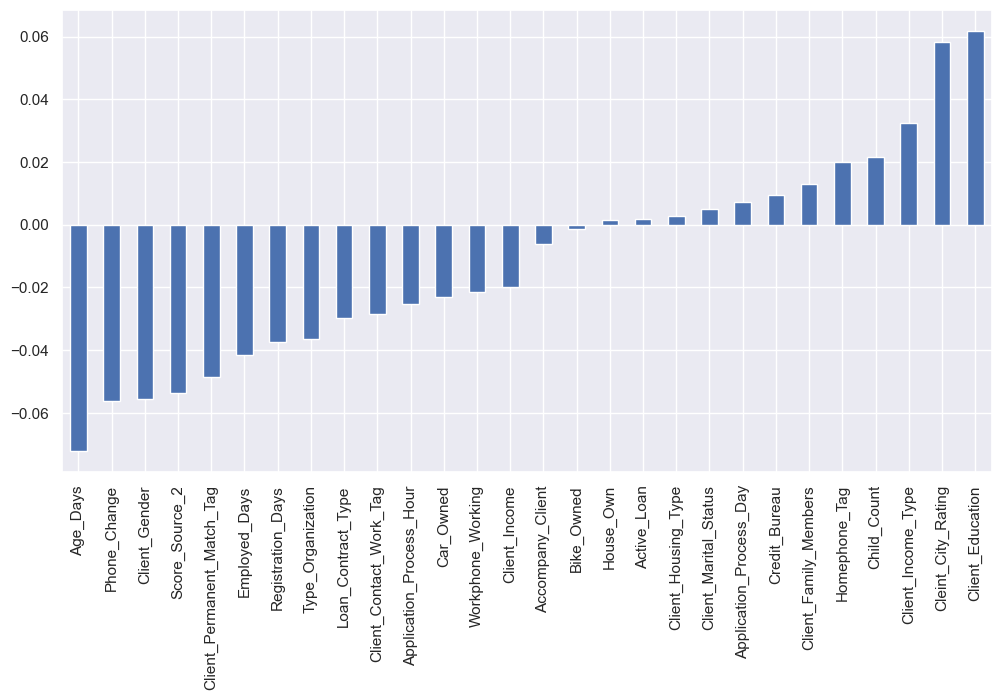

In [31]:
plt.figure(figsize=(12,6))
df.corr()['Default'][:-1].sort_values().plot(kind='bar')
plt.xticks(rotation=90)
plt.show()

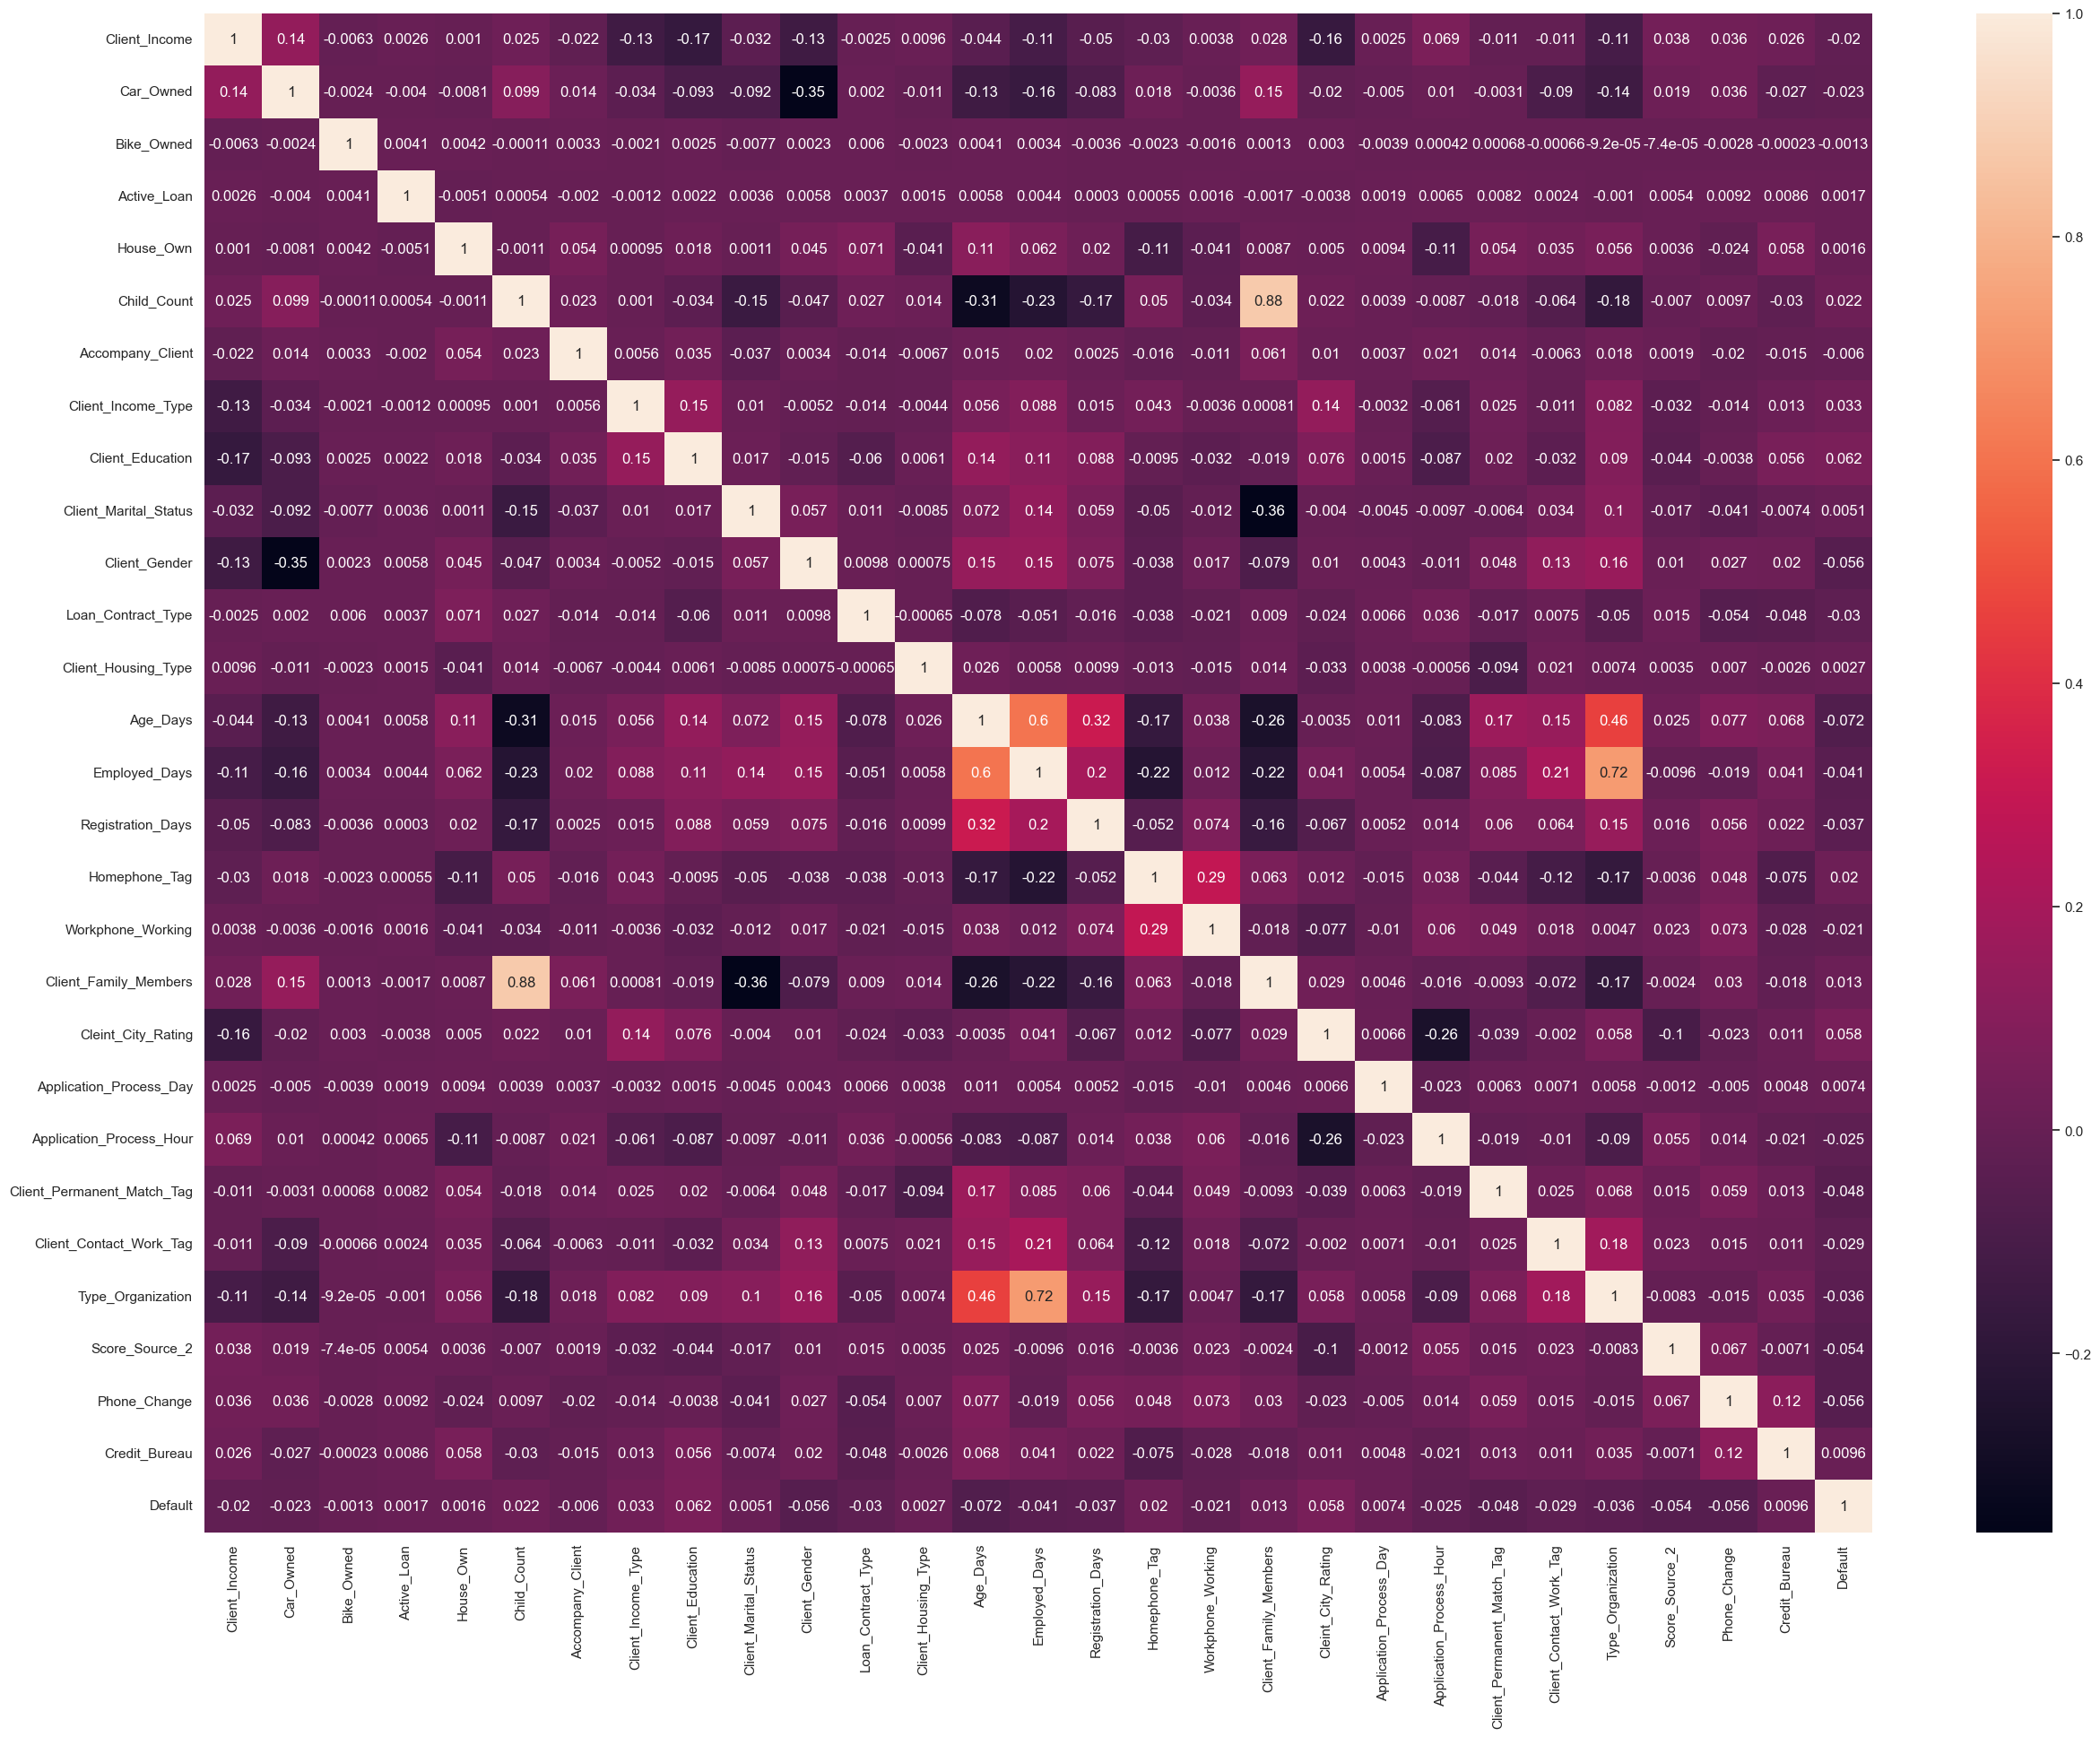

In [32]:
# Correlation Heatmap
plt.figure(figsize=(30, 22))
sns.heatmap(df.corr(), fmt='.2g', annot=True)
plt.show()

In [33]:
# Drop Child_Count column because it have high correlation with Client_Family_Members
df.drop(columns = 'Child_Count', inplace=True)

In [85]:
df.head()

,Client_Income,Car_Owned,Bike_Owned,Active_Loan,House_Own,Accompany_Client,Client_Income_Type,Client_Education,Client_Marital_Status,Client_Gender,...,Cleint_City_Rating,Application_Process_Day,Application_Process_Hour,Client_Permanent_Match_Tag,Client_Contact_Work_Tag,Type_Organization,Score_Source_2,Phone_Change,Credit_Bureau,Default
0,"6,750.00",0,0,1,0,1,1,4,1,1,...,2.00,6.00,17.00,1,1,2,0.48,63.00,1.00,0
3,"15,750.00",0,0,1,1,1,4,4,1,1,...,3.00,2.00,15.00,1,1,5,0.14,"1,700.00",3.00,0
5,"11,250.00",0,1,1,1,1,5,4,3,0,...,2.00,2.00,10.00,1,1,2,0.70,739.00,0.00,0
6,"15,750.00",1,1,0,1,1,4,4,2,1,...,2.00,3.00,14.00,1,1,5,0.60,0.00,3.00,0
7,"13,500.00",0,0,1,1,1,4,4,1,1,...,2.00,4.00,15.00,1,1,5,0.66,"1,687.00",4.00,0


## Train Test Split

In [36]:
X = df.drop('Default', axis=1)
y = df['Default']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2,random_state=0)

## Remove Outlier from Train Data using Z-Score

In [37]:
# Define the columns for which you want to remove outliers
selected_columns = ['Client_Income', 'Employed_Days', 'Registration_Days',
                    'Client_Family_Members', 'Application_Process_Hour', 'Score_Source_2',
                    'Phone_Change','Credit_Bureau']

# Calculate the Z-scores for the selected columns in the training data
z_scores = np.abs(stats.zscore(X_train[selected_columns]))

# Set a threshold value for outlier detection (e.g., 3)
threshold = 3

# Find the indices of outliers based on the threshold
outlier_indices = np.where(z_scores > threshold)[0]

# Remove the outliers from the training data
X_train = X_train.drop(X_train.index[outlier_indices])
y_train = y_train.drop(y_train.index[outlier_indices])

## Decision Tree Classifier

In [52]:
dtree = DecisionTreeClassifier(random_state=0, max_depth=9, min_samples_leaf=2, min_samples_split=3, class_weight='balanced')
dtree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=9, min_samples_leaf=2,
                       min_samples_split=3, random_state=0)

### Accuracy evaluation

In [53]:
# accuracy on test data
y_pred = dtree.predict(X_test)
test_data_accuracy = accuracy_score(y_pred, y_test)

print(f'Accuracy on Training data : {test_data_accuracy *100:.2f}%')

Accuracy on Training data : 61.30%


In [67]:
print(f'F-1 Score : {f1_score(y_test, y_pred, average="micro")*100:.2f}%')
print(f'Precision Score : {precision_score(y_test, y_pred, average="micro")*100:.2f}%')
print(f'Recall Score : {recall_score(y_test, y_pred, average="micro")*100:.2f}%')
print(f'Jaccard Score : {jaccard_score(y_test, y_pred, average="micro")*100:.2f}%')
print(f'Log Loss : {log_loss(y_test, y_pred)}')

F-1 Score : 61.30%
Precision Score : 61.30%
Recall Score : 61.30%
Jaccard Score : 44.19%
Log Loss : 13.36733046316804


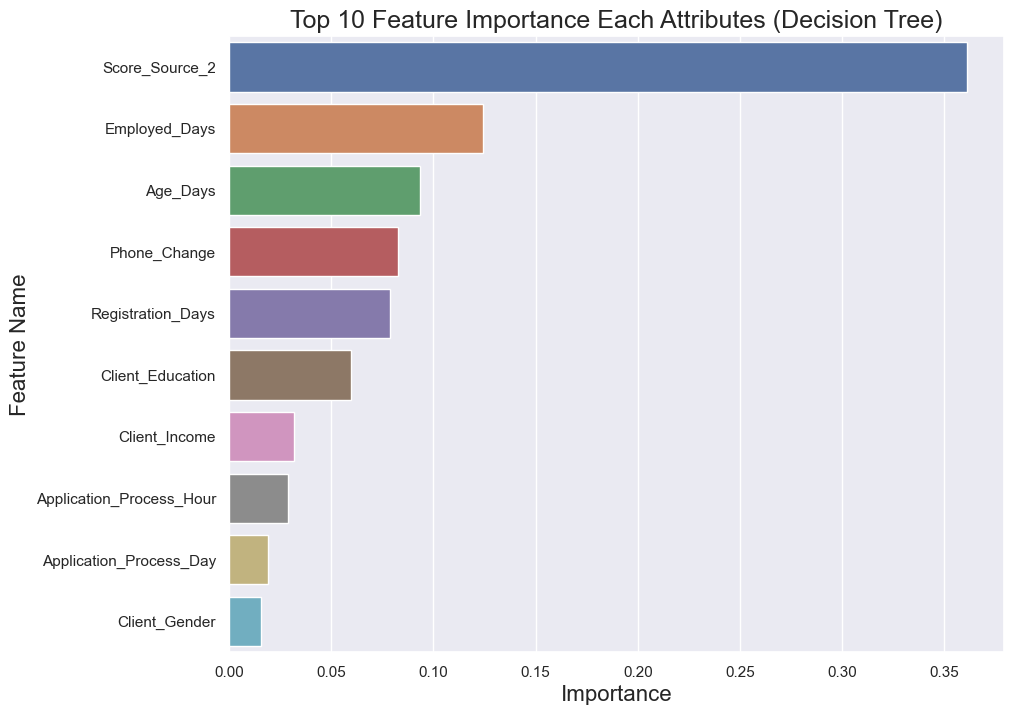

In [77]:
imp_df = pd.DataFrame({
    "Feature Name": X_train.columns,
    "Importance": dtree.feature_importances_
})
fi = imp_df.sort_values(by="Importance", ascending=False)

fi2 = fi.head(10)
plt.figure(figsize=(10,8))
sns.barplot(data=fi2, x='Importance', y='Feature Name')
plt.title('Top 10 Feature Importance Each Attributes (Decision Tree)', fontsize=18)
plt.xlabel ('Importance', fontsize=16)
plt.ylabel ('Feature Name', fontsize=16)
plt.show()

### Confusion Matrix

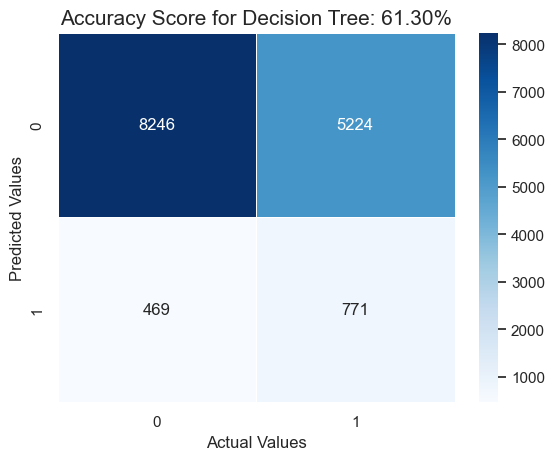

In [72]:
sns.heatmap(confusion_matrix(y_test, y_pred),linewidths=.5, annot=True, fmt="d", cmap='Blues')
plt.ylabel('Predicted Values')
plt.xlabel('Actual Values')
title = f'Accuracy Score for Decision Tree: {test_data_accuracy *100:.2f}%'
plt.title(title, size = 15)
plt.show()

## Random Forest Classifier

In [74]:
rfc = RandomForestClassifier(random_state=0, max_depth=None, max_features=None, n_estimators=100, class_weight='balanced')
rfc.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', max_features=None,
                       random_state=0)

In [75]:
# accuracy on test data
y_pred2 = rfc.predict(X_test)
test_data_accuracy2 = accuracy_score(y_pred2, y_test)

print(f'Accuracy on Training data : {test_data_accuracy2 *100:.2f}%')

Accuracy on Training data : 92.09%


In [76]:
print(f'F-1 Score : {f1_score(y_test, y_pred2, average="micro")*100:.2f}%')
print(f'Precision Score : {precision_score(y_test, y_pred2, average="micro")*100:.2f}%')
print(f'Recall Score : {recall_score(y_test, y_pred2, average="micro")*100:.2f}%')
print(f'Jaccard Score : {jaccard_score(y_test, y_pred2, average="micro")*100:.2f}%')
print(f'Log Loss : {log_loss(y_test, y_pred2)}')

F-1 Score : 92.09%
Precision Score : 92.09%
Recall Score : 92.09%
Jaccard Score : 85.33%
Log Loss : 2.73304835627859


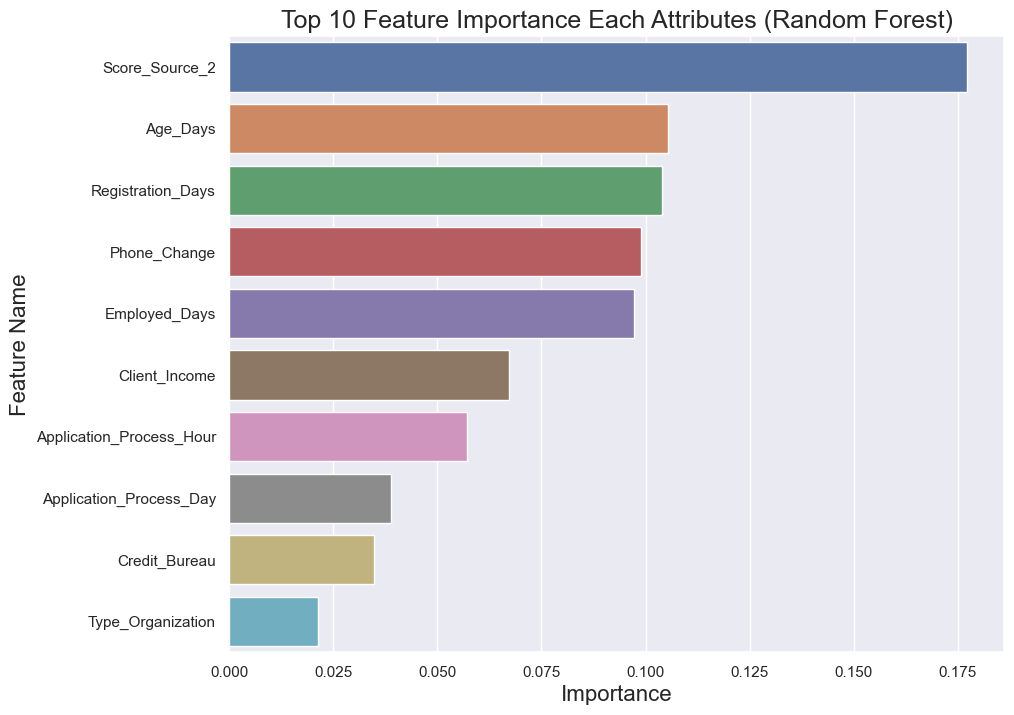

In [78]:
imp_df = pd.DataFrame({
    "Feature Name": X_train.columns,
    "Importance": rfc.feature_importances_
})
fi = imp_df.sort_values(by="Importance", ascending=False)

fi2 = fi.head(10)
plt.figure(figsize=(10,8))
sns.barplot(data=fi2, x='Importance', y='Feature Name')
plt.title('Top 10 Feature Importance Each Attributes (Random Forest)', fontsize=18)
plt.xlabel ('Importance', fontsize=16)
plt.ylabel ('Feature Name', fontsize=16)
plt.show()

### Confusion Matrix

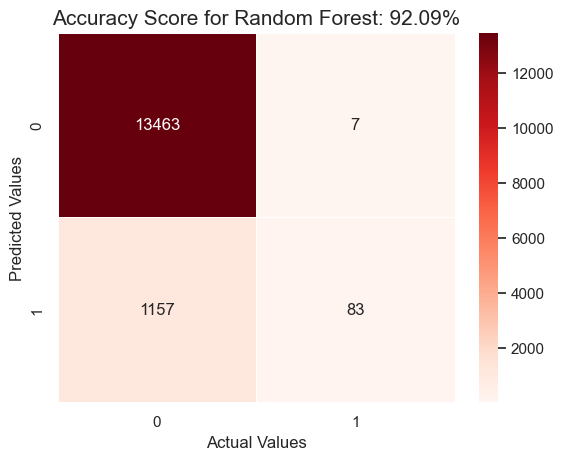

In [81]:
sns.heatmap(confusion_matrix(y_test, y_pred2),linewidths=.5, annot=True, fmt="d", cmap='Reds')
plt.ylabel('Predicted Values')
plt.xlabel('Actual Values')
title = f'Accuracy Score for Random Forest: {test_data_accuracy2 *100:.2f}%'
plt.title(title, size = 15)
plt.show()

# Conclusion

For the construction of the prediction model, the random forest model will be used due to its 92,09% accuracy.

## Building a Predictive System

In [98]:
X_train.head()

,Client_Income,Car_Owned,Bike_Owned,Active_Loan,House_Own,Accompany_Client,Client_Income_Type,Client_Education,Client_Marital_Status,Client_Gender,Loan_Contract_Type,Client_Housing_Type,Age_Days,Employed_Days,Registration_Days,Homephone_Tag,Workphone_Working,Client_Family_Members,Cleint_City_Rating,Application_Process_Day,Application_Process_Hour,Client_Permanent_Match_Tag,Client_Contact_Work_Tag,Type_Organization,Score_Source_2,Phone_Change,Credit_Bureau
48994,"20,250.00",1,1,1,1,1,5,4,1,0,0,1,"19,428.00",191.00,"8,364.00",0,0,3.00,1.00,4.00,16.00,1,0,2,0.72,"3,332.00",5.00
17643,"27,000.00",1,1,0,1,5,4,4,1,0,0,1,"22,587.00","2,213.00","5,875.00",0,0,2.00,2.00,5.00,10.00,1,1,5,0.63,"1,064.00",1.00
82022,"14,400.00",1,0,0,1,1,5,4,1,0,1,1,"19,547.00","2,890.00","3,131.00",0,0,2.00,3.00,4.00,8.00,1,0,0,0.49,0.00,0.00
92674,"18,000.00",1,0,1,1,6,5,4,1,0,0,1,"11,286.00","1,156.00",563.00,0,0,2.00,2.00,0.00,14.00,1,1,0,0.14,76.00,1.00
94471,"20,250.00",0,0,0,1,1,1,4,0,1,0,1,"19,462.00",960.00,"6,078.00",0,0,2.00,2.00,4.00,13.00,1,1,2,0.62,"2,101.00",0.00


In [99]:
y_train.head()

48994    1
17643    0
82022    0
92674    0
94471    0
Name: Default, dtype: int32

In [ ]:
def prediction (data):
    input_data_as_numpy_array= np.asarray(data)

    input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

    prediction = rfc.predict(input_data_reshaped)
    
    print(f'The result is {prediction[0]}')

    if (prediction[0]== 0):
      print('No Default')
    else:
      print('Default')

In [100]:
input_data = (20250.00,1,1,1,1,1,5,4,1,0,0,1,19428.00,191.00,8364.00,0,0,3.00,1.00,4.00,16.00,1,0,2,0.72,3332.00,5.00)
prediction(input_data)

The result is 1
Default


In [101]:
input_data = (14400.00,1,0,0,1,1,5,4,1,0,1,1,19547.00,2890.00,3131.00,0,0,2.00,3.00,4.00,8.00,1,0,0,0.49,0.00,0.00)
prediction(input_data)

The result is 0
No Default
